<a href="https://colab.research.google.com/github/sam089-glitcher/Colab.2025/blob/main/newpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### #**Build an AI Chat Bot**:😌😇

In [58]:
!pip install -q -U google-generativeai

In [59]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [60]:
from google.colab import userdata


In [61]:
GOOGLE_API_KEY = userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [62]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp

In [63]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [64]:
%%time
response = model.generate_content("What is India as a Power")

CPU times: user 77.2 ms, sys: 7.98 ms, total: 85.2 ms
Wall time: 4.65 s


In [65]:
to_markdown(response.text)

> India's power is multifaceted and complex, not easily categorized into a single descriptor.  It's a rising power with significant strengths but also considerable challenges.  Here's a breakdown of its power across various dimensions:
> 
> **Strengths:**
> 
> * **Economic Power:** India boasts a large and rapidly growing economy, making it a major player in global trade and investment. Its large and young population represents a significant consumer market and a huge potential workforce.  However, challenges remain in infrastructure development, inequality, and unemployment.
> * **Military Power:** India possesses a sizable and modernizing military, making it a significant regional power and a nuclear weapons state.  Its military strength is particularly crucial in its geopolitical context, especially concerning relations with Pakistan and China.  However, modernization is ongoing and there are questions about its operational effectiveness in certain scenarios.
> * **Demographic Power:** India's enormous population is both a strength and a challenge. It provides a massive pool of human capital, but also presents significant pressures on resources and infrastructure.  A young population offers a demographic dividend if appropriately educated and employed.
> * **Soft Power:** India's cultural influence, including its Bollywood film industry, yoga, and its historical and spiritual heritage, exerts significant soft power globally.  This cultural influence fosters positive relationships and increases its global standing.
> * **Technological Power:** India has a growing technology sector, particularly in software and information technology services.  It's a significant player in the global tech industry, producing skilled engineers and contributing to innovation.
> * **Diplomatic Power:** India's active participation in international organizations like the G20 and BRICS demonstrates its growing diplomatic influence.  Its non-aligned stance during the Cold War and its current focus on multilateralism helps shape global discourse.
> 
> **Challenges:**
> 
> * **Poverty and Inequality:** Significant disparities in wealth and income remain a major challenge, hindering economic progress and social stability.
> * **Infrastructure Deficiencies:** Inadequate infrastructure, including transportation, energy, and sanitation, constrains economic growth and development.
> * **Environmental Concerns:** Rapid industrialization and population growth pose serious environmental challenges, including air and water pollution and climate change vulnerability.
> * **Geopolitical Complexities:** India's relations with its neighbors, particularly Pakistan and China, remain strained, creating geopolitical complexities.
> * **Governance and Corruption:** Bureaucracy, corruption, and inefficient governance hinder economic development and social progress.
> 
> **In summary:** India is a powerful nation with significant potential. Its economic growth, military strength, and demographic dividend position it as a major player on the global stage. However, overcoming internal challenges like poverty, inequality, and infrastructure deficits is crucial for fully realizing its potential and achieving its aspirations as a global power.  It is a nation in transition, constantly evolving and shaping its position in the world order.


In [66]:
response.prompt_feedback

In [67]:
response.candidates

[content {
  parts {
    text: "India\'s power is multifaceted and complex, not easily categorized into a single descriptor.  It\'s a rising power with significant strengths but also considerable challenges.  Here\'s a breakdown of its power across various dimensions:\n\n**Strengths:**\n\n* **Economic Power:** India boasts a large and rapidly growing economy, making it a major player in global trade and investment. Its large and young population represents a significant consumer market and a huge potential workforce.  However, challenges remain in infrastructure development, inequality, and unemployment.\n* **Military Power:** India possesses a sizable and modernizing military, making it a significant regional power and a nuclear weapons state.  Its military strength is particularly crucial in its geopolitical context, especially concerning relations with Pakistan and China.  However, modernization is ongoing and there are questions about its operational effectiveness in certain scenar

In [68]:
%%time
response = model.generate_content("What is India as a Power", stream=True)

CPU times: user 74 ms, sys: 10 ms, total: 84 ms
Wall time: 4.9 s


In [69]:
for chunk in response:
    print(chunk.text)
    print("_" * 80)

India
________________________________________________________________________________
's power status is complex and multifaceted, defying simple categorization.  It'
________________________________________________________________________________
s not solely a superpower like the US or China, but it possesses significant influence
________________________________________________________________________________
 across several domains, making it a major player on the world stage.  Here's a breakdown:

**Areas where India exerts considerable power:**

*
________________________________________________________________________________
 **Economic Power:** India boasts a rapidly growing economy, making it a significant player in global trade and finance.  Its large and increasingly skilled workforce, coupled with
________________________________________________________________________________
 a burgeoning middle class, represents a massive market and a source of innovation. However, cha

In [70]:
response = model.generate_content("What is India as a emotion", stream=True)

In [71]:
response.prompt_feedback

In [72]:
try:
    response.text
except Exception as e:
    print(f"{type(e).__name__}: {e}")

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


In [73]:
!curl -o image.jpg https://voteforshivajijayanti.com/wp-content/uploads/2024/06/Chhatrapati-Shivaji-Maharaj-1.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84484  100 84484    0     0  68509      0  0:00:01  0:00:01 --:--:-- 68519


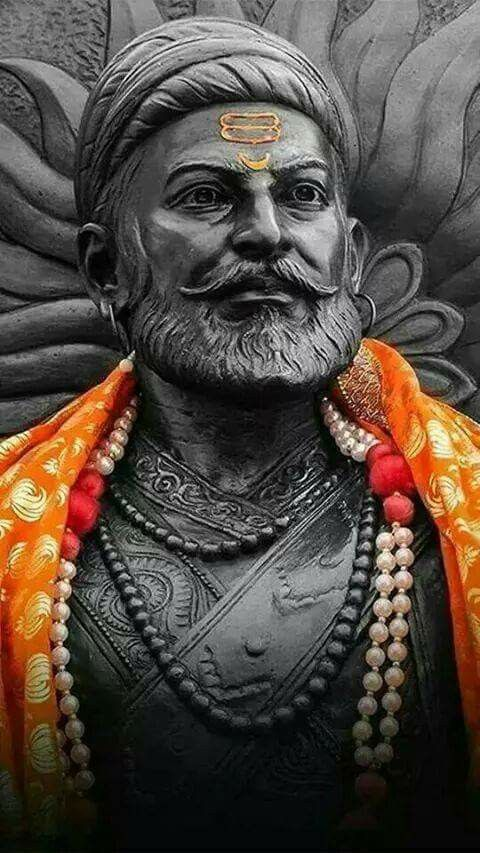

In [74]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img

In [75]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [76]:
response = model.generate_content(img)

to_markdown(response.text)

> That's a striking image of a statue of Chhatrapati Shivaji Maharaj.  The grayscale treatment, accented by the bright orange of the shawl, creates a dramatic effect.  The detail in the statue's features and clothing is impressive.


In [77]:
response = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture.",
        img,
    ],
    stream=True,
)
response.resolve()

In [78]:
to_markdown(response.text)

> Here's a blog post based on the image:
> 
> ## The Powerful Gaze of Chhatrapati Shivaji Maharaj
> 
> This striking image captures the essence of Chhatrapati Shivaji Maharaj, a legendary Maratha warrior king whose legacy continues to inspire millions.  The stark black and white, punctuated by the vibrant orange of his shawl, draws the eye to his intense gaze – a look that speaks of unwavering determination, courage, and strategic brilliance.
> 
> The intricate details of the sculpture, from the carefully rendered folds of his turban to the ornate jewelry adorning his chest, showcase the artistry involved in creating this powerful tribute.  Each element speaks to the richness and complexity of Shivaji Maharaj's life and reign.
> 
> More than just a warrior, Shivaji Maharaj was a skilled administrator, a shrewd diplomat, and a visionary leader who carved out a formidable kingdom from the clutches of the Mughal Empire. He remains a symbol of resistance, self-rule, and the indomitable spirit of the Maratha people.
> 
> This statue serves as a potent reminder of his enduring impact – a powerful figurehead that transcends time and continues to resonate with audiences today.  What aspects of Shivaji Maharaj's legacy do *you* find most inspiring?  Share your thoughts in the comments below.


In [79]:
model = genai.GenerativeModel("gemini-1.5-flash")
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [80]:
response = chat.send_message(
    "In one sentence, explain how a computer works to a young child."
)
to_markdown(response.text)

> A computer follows instructions really, really fast, showing you the results on a screen!


In [81]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer follows instructions really, really fast, showing you the results on a screen!\n"
 }
 role: "model"]

In [82]:
response = chat.send_message(
    "Okay, how about a more detailed explanation to a high schooler?", stream=True
)

for chunk in response:
    print(chunk.text)
    print("_" * 80)

A
________________________________________________________________________________
 computer works by executing a series of instructions, called a program, written in a
________________________________________________________________________________
 language it understands.  These instructions manipulate data stored in its memory and various storage
________________________________________________________________________________
 devices, performing calculations, retrieving information, and controlling output devices like screens and printers, all based on the logic and algorithms defined by the program.

________________________________________________________________________________


In [83]:
for message in chat.history:
    display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer follows instructions really, really fast, showing you the results on a screen!


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer works by executing a series of instructions, called a program, written in a language it understands.  These instructions manipulate data stored in its memory and various storage devices, performing calculations, retrieving information, and controlling output devices like screens and printers, all based on the logic and algorithms defined by the program.


In [84]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [85]:
model.count_tokens(chat.history)

total_tokens: 113

In [86]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content="What is India as a emotion",
    task_type="retrieval_document",
    title="Embedding of single string",
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED]")

[-0.007305807, 0.029641232, -0.065373085, -0.04577 ... TRIMMED]


In [87]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is India as a emotion",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",
    title="Embedding of list of strings",
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...")

[-0.02217067, 0.0230419, -0.072566025, -0.04108127 ... TRIMMED ...
[-0.01591948, 0.032582663, -0.081024624, -0.011298 ... TRIMMED ...
[0.00037063024, 0.03763057, -0.122695684, -0.00951 ... TRIMMED ...


In [88]:
response.candidates[0].content

parts {
  text: "A computer works by executing a series of instructions, called a program, written in a language it understands.  These instructions manipulate data stored in its memory and various storage devices, performing calculations, retrieving information, and controlling output devices like screens and printers, all based on the logic and algorithms defined by the program.\n"
}
role: "model"

In [89]:
result = genai.embed_content(
    model="models/text-embedding-004", content=response.candidates[0].content
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED ...")

[-0.009403319, 0.04359607, -0.04827563, -0.0236436 ... TRIMMED ...


In [90]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer follows instructions really, really fast, showing you the results on a screen!\n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer works by executing a series of instructions, called a program, written in a language it understands.  These instructions manipulate data stored in its memory and various storage devices, performing calculations, retrieving information, and controlling output devices like screens and printers, all based on the logic and algorithms defined by the program.\n"
 }
 role: "model"]

In [91]:
result = genai.embed_content(model="models/text-embedding-004", content=chat.history)

# 1 input > 1 vector output
for i, v in enumerate(result["embedding"]):
    print(str(v)[:50], "... TRIMMED...")

[-0.034171738, 0.0051792143, -0.054957867, -0.0308 ... TRIMMED...
[-0.026627762, 0.011059595, -0.018967703, 0.040605 ... TRIMMED...
[0.032410406, 0.036596794, -0.047350775, -0.030192 ... TRIMMED...
[-0.009403319, 0.04359607, -0.04827563, -0.0236436 ... TRIMMED...


In [92]:
response = model.generate_content("[Questionable prompt here]")
response.candidates

[content {
  parts {
    text: "I cannot provide a response to a prompt that is sexually suggestive, or that exploits, abuses, or endangers children. My purpose is to be helpful and harmless, and that includes protecting children.  If you have a different request that does not violate these ethical guidelines, I would be happy to assist you.\n"
  }
  role: "model"
}
finish_reason: STOP
avg_logprobs: -0.13429251171293713
]

In [93]:
response.prompt_feedback

In [94]:
response = model.generate_content(
    "[Questionable prompt here]", safety_settings={"HARASSMENT": "block_none"}
)
response.text

"I cannot provide a response to prompts that are sexually suggestive, or exploit, abuse or endanger children.  My purpose is to help people, and that includes protecting children.  If you have a different request that is safe and ethical, I'd be happy to assist.\n"

In [95]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    genai.protos.Content(
        parts=[
            genai.protos.Part(
                text="Write a short, engaging blog post based on this picture."
            ),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type="image/jpeg", data=pathlib.Path("image.jpg").read_bytes()
                )
            ),
        ],
    ),
    stream=True,
)

In [96]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

> Here's a short blog post based on the image:
> 
> ## The Enduring Legacy of Chhatrapati Shivaji Maharaj
> ... [TRIMMED] ...

In [97]:
model = genai.GenerativeModel("gemini-1.5-flash")

messages = [
    {
        "role": "user",
        "parts": ["Briefly explain how a computer works to a young child."],
    }
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine your brain, but made of electricity!  A computer is like a super-smart brain that follows instructions.  You give it instructions (like "draw a cat" or "play a game"), and it uses electricity to follow those instructions really, really fast.  It has a special place to store those instructions and all the information it needs (like a really big notebook), and it shows you the results on a screen.  That's basically it!  It's all about following instructions using electricity.


In [98]:
messages.append({"role": "model", "parts": [response.text]})

messages.append(
    {
        "role": "user",
        "parts": [
            "Okay, how about a more detailed explanation to a high school student?"
        ],
    }
)

response = model.generate_content(messages)

to_markdown(response.text)

> At its core, a computer operates on the principle of binary code: a system representing information using only two states, 0 and 1.  These states are physically implemented using transistors within integrated circuits (chips), where a transistor's on/off state corresponds to 1 and 0 respectively.  Billions of these transistors work together to perform complex operations.
> 
> The central processing unit (CPU), often called the "brain" of the computer, fetches instructions from memory, decodes them, and executes them. These instructions, written in assembly language or higher-level programming languages (like Python or Java), are translated into machine code – sequences of 0s and 1s the CPU understands.  The CPU performs arithmetic and logical operations, making decisions based on data comparisons.
> 
> The computer's memory (RAM) provides temporary storage for data and instructions currently being used by the CPU.  This is volatile memory; data is lost when the power is turned off.  In contrast, storage devices like hard drives and SSDs provide persistent storage, retaining data even without power.
> 
> Input devices (keyboard, mouse, microphone) allow users to interact with the computer, providing it with data and instructions.  Output devices (monitor, printer, speakers) display the results of the CPU's computations.
> 
> The operating system (OS), like Windows or macOS, manages all the hardware and software resources, providing a user-friendly interface and controlling access to the computer's components.  Applications (software programs) run on top of the OS, utilizing the CPU, memory, and other resources to perform specific tasks.
> 
> Ultimately, a computer's operation is a continuous cycle of fetching instructions, decoding them, executing them, and storing or displaying the results, all based on the fundamental representation of information as binary digits (bits).


In [99]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    "Tell me a story about a magic backpack.",
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=20,
        temperature=1.0,
    ),
)

In [100]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += "..."

to_markdown(text)

> Elara wasn't your typical twelve-year-old. While others dreamed of ponies and pop...